In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [4]:
print(df.shape)
df.head()

(15, 2)


,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [5]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


# Checking for outliers

In [6]:
iqr = df['Ground Temperature'].quantile(0.75) - df['Ground Temperature'].quantile(0.25)
upper_threshold = df['Ground Temperature'].quantile(0.75) + (1.5 * iqr) # q3 + 1.5iqr
lower_threshold = df['Ground Temperature'].quantile(0.25) - (1.5 * iqr) # q1 - 1.5iqr
print('The upper threshold is :',upper_threshold)
print('The lower threshold is :',lower_threshold)

The upper threshold is : 98.4
The lower threshold is : 58.400000000000006


From the above calcuation it is clearly visible that there are no outliers in the data.


In [7]:
df.isnull().sum() ## To check for null valvues

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [8]:
df.dtypes ## To check the format

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [9]:
df=df.drop_duplicates()

In [10]:
df.shape ## There are no duplicates

(15, 2)

Text(0, 0.5, 'Chirps/Second')

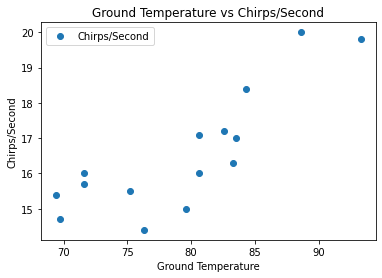

In [11]:
## Scatter Plot to identify any linear relationship between the feature and target
df.plot(x='Ground Temperature',y='Chirps/Second',style='o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')

In [12]:
df.corr() ##Correlation matrix to confirm linearity 0.834 suggest strong linearity Therefore linear regression can be used

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [13]:
df['Chirps/Second'].values

array([20. , 16. , 19.8, 18.4, 17.1, 15.5, 14.7, 15.7, 15.4, 16.3, 15. ,
       17.2, 16. , 17. , 14.4])

In [14]:
x=df[['Ground Temperature']]
y=df['Chirps/Second']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=101)

In [17]:
X_test.shape

(5, 1)

In [18]:
from sklearn.linear_model import LinearRegression

In [55]:
reg=LinearRegression(copy_X=True,fit_intercept=True,n_jobs=1,normalize=False)

In [56]:
reg.fit(X_train,y_train)

C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


LinearRegression(n_jobs=1, normalize=False)

In [57]:
y_pred=reg.predict(X_test)

In [58]:
y_pred

array([17.52841969, 19.45345946, 17.68556579, 16.95876506, 16.76233243])

In [59]:
y_test

13    17.0
2     19.8
3     18.4
12    16.0
10    15.0
Name: Chirps/Second, dtype: float64

In [60]:
print(reg.intercept_)

1.1262950486401326


In [61]:
print(reg.coef_[0])

0.19643263039874967


In [62]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(reg.coef_[0], reg.intercept_))

Linear Regression Equation: y = 0.1964 * x + 1.1263


In [27]:
from sklearn import metrics # metrics will contain all the evaluation metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))
reg.score(X_test,y_test) # another way to get the r^2 values

R2- SCORE: 0.6599517659363732


0.6599517659363732

In [28]:
## R2-Score has come out to be 0.659 which suggest that the equalation has got decent coorelation ##

In [113]:
print(reg.predict([[95]])) ## At 95 Degree F the chirps/sec would be : 19.78 ##

[19.78739494]


C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
df['Pred_chirps']=df['Ground Temperature'].apply(lambda x : reg.predict([[x]]))

C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Santhosh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarn

In [31]:
df.head()

,Chirps/Second,Ground Temperature,Pred_chirps
0,20.0,88.6,[18.530226101969355]
1,16.0,71.6,[15.190871385190608]
2,19.8,93.3,[19.453459464843476]
3,18.4,84.3,[17.68556579125473]
4,17.1,80.6,[16.958765058779356]


In [32]:
df['Pred_chirps'].dtype

dtype('O')

In [33]:
df['Chirps/Second'].dtype

dtype('float64')

In [34]:
df['Pred_chirps']=df['Pred_chirps'].astype(float)

In [35]:
df.head()

,Chirps/Second,Ground Temperature,Pred_chirps
0,20.0,88.6,18.530226
1,16.0,71.6,15.190871
2,19.8,93.3,19.453459
3,18.4,84.3,17.685566
4,17.1,80.6,16.958765


In [36]:
## Charting Original data and equation ##

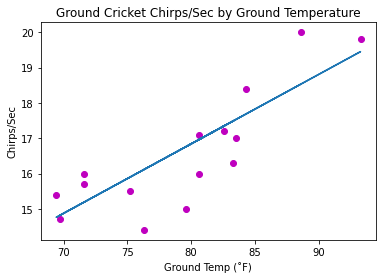

In [102]:
plt.scatter(df['Ground Temperature'], df['Chirps/Second'], color='m')
plt.plot(df['Ground Temperature'], df['Pred_chirps'])
plt.title('Ground Cricket Chirps/Sec by Ground Temperature')
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [ ]:
## Temperature 86.08 F will be obeserved when the rate of Chirps is 18 Chirps/Second ##